## Regression with Categorical Outcome Variable: NBA Data Set

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
#Import Data
NBA = pd.read_csv("Assignment Data/NBA_Games2.csv")

In [4]:
#Display Data
display(NBA[0:10])

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN
0,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900072,2019-07-12,...,13,23,36,14,15,3,12,24,8.0,1
1,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900060,2019-07-11,...,9,28,37,19,10,8,22,25,-5.0,0
2,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900042,2019-07-09,...,7,27,34,17,5,5,18,21,18.2,1
3,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900023,2019-07-07,...,9,27,36,7,7,10,18,28,-24.0,0
4,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900013,2019-07-06,...,9,30,39,13,11,6,13,21,2.0,0
5,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801220,2019-04-10,...,22,39,61,29,5,7,17,25,-1.0,0
6,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801202,2019-04-07,...,9,39,48,25,2,3,11,28,-8.0,0
7,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801181,2019-04-05,...,10,28,38,21,16,4,14,21,-36.0,0
8,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801168,2019-04-03,...,11,33,44,29,7,7,11,26,8.0,1
9,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801162,2019-04-02,...,11,32,43,26,13,2,11,18,-6.0,0


In [5]:
# Filter 2017 regular season encoded with '22017'
# Note: All the pre-season games are recorded with GAME_ID larger than 1000000000.  
NBA17 = NBA[(NBA.SEASON_ID == 22017) & (NBA.GAME_ID < 1000000000)]

display(NBA17[0:10])

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN
101,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701214,2018-04-10,...,8,31,39,27,10,3,10,24,-8.0,0
102,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701202,2018-04-08,...,5,32,37,23,7,4,13,19,6.0,1
103,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701184,2018-04-06,...,7,43,50,24,5,5,18,22,6.0,1
104,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701172,2018-04-04,...,10,38,48,20,5,6,15,16,-29.0,0
105,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701158,2018-04-03,...,12,37,49,24,10,1,15,15,-3.0,0
106,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701147,2018-04-01,...,5,47,52,33,0,3,14,15,6.0,1
107,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701130,2018-03-30,...,15,44,59,24,9,4,16,14,-10.0,0
108,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701120,2018-03-28,...,4,33,37,26,10,2,19,22,-6.0,0
109,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701101,2018-03-25,...,7,38,45,18,5,2,13,14,-19.0,0
110,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701087,2018-03-23,...,5,39,44,24,5,5,11,14,-12.0,0


In [6]:
# Display columns of the data
NBA17.columns

Index(['CITY', 'TEAM_NAME', 'TEAM_ID', 'NICKNAME', 'STATE', 'YEAR_FOUNDED',
       'SEASON_ID', 'TEAM_ABBREVIATION', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS', 'WIN'],
      dtype='object')

In [7]:
# Select columns used for forecasting model
NBA17 = NBA17[['GAME_ID', 'MATCHUP', 'PTS', 'PLUS_MINUS', 'WIN']]

display(NBA17[0:10])
NBA17.shape

,GAME_ID,MATCHUP,PTS,PLUS_MINUS,WIN
101,21701214,ATL vs. PHI,113,-8.0,0
102,21701202,ATL @ BOS,112,6.0,1
103,21701184,ATL @ WAS,103,6.0,1
104,21701172,ATL vs. MIA,86,-29.0,0
105,21701158,ATL @ MIA,98,-3.0,0
106,21701147,ATL vs. ORL,94,6.0,1
107,21701130,ATL vs. PHI,91,-10.0,0
108,21701120,ATL @ MIN,114,-6.0,0
109,21701101,ATL @ HOU,99,-19.0,0
110,21701087,ATL @ GSW,94,-12.0,0


(2378, 5)

In [8]:
# new data frame with split value columns from MATCHUP
match = NBA['MATCHUP'].str.split(" ", n =2, expand = True)

display(match[0:10])

,0,1,2
0,ATL,@,SAS
1,ATL,@,WAS
2,ATL,vs.,IND
3,ATL,vs.,MIN
4,ATL,@,MIL
5,ATL,vs.,IND
6,ATL,@,MIL
7,ATL,@,ORL
8,ATL,vs.,PHI
9,ATL,@,SAS


In [9]:
# Make separate columns in the NBA17 data frame from match data frame
NBA17['team'] = match[0]
NBA17['opp'] = match[2]

# Make separate 'team' column in the NBA17 data frame from match data frame
NBA17['home_away'] = match[1]

# Drop old column (i.e., MATCHUP) 
NBA17.drop(columns = ['MATCHUP'], inplace = True)

In [10]:
# Display the resulting data frame with added columns

display(NBA17[0:10])

,GAME_ID,PTS,PLUS_MINUS,WIN,team,opp,home_away
101,21701214,113,-8.0,0,ATL,PHI,vs.
102,21701202,112,6.0,1,ATL,BOS,@
103,21701184,103,6.0,1,ATL,WAS,@
104,21701172,86,-29.0,0,ATL,MIA,vs.
105,21701158,98,-3.0,0,ATL,MIA,@
106,21701147,94,6.0,1,ATL,ORL,vs.
107,21701130,91,-10.0,0,ATL,PHI,vs.
108,21701120,114,-6.0,0,ATL,MIN,@
109,21701101,99,-19.0,0,ATL,HOU,@
110,21701087,94,-12.0,0,ATL,GSW,@


In [11]:
# Create a home dummy variable
NBA17['HOME'] = NBA17['home_away'].apply(lambda x: 1 if x == 'vs.' else 0)

display(NBA17[0:10])

,GAME_ID,PTS,PLUS_MINUS,WIN,team,opp,home_away,HOME
101,21701214,113,-8.0,0,ATL,PHI,vs.,1
102,21701202,112,6.0,1,ATL,BOS,@,0
103,21701184,103,6.0,1,ATL,WAS,@,0
104,21701172,86,-29.0,0,ATL,MIA,vs.,1
105,21701158,98,-3.0,0,ATL,MIA,@,0
106,21701147,94,6.0,1,ATL,ORL,vs.,1
107,21701130,91,-10.0,0,ATL,PHI,vs.,1
108,21701120,114,-6.0,0,ATL,MIN,@,0
109,21701101,99,-19.0,0,ATL,HOU,@,0
110,21701087,94,-12.0,0,ATL,GSW,@,0


In [12]:
# Drop home_away column from data frame

NBA17.drop(columns = ['home_away'], inplace = True)

# Display the output
display(NBA17[0:10])

,GAME_ID,PTS,PLUS_MINUS,WIN,team,opp,HOME
101,21701214,113,-8.0,0,ATL,PHI,1
102,21701202,112,6.0,1,ATL,BOS,0
103,21701184,103,6.0,1,ATL,WAS,0
104,21701172,86,-29.0,0,ATL,MIA,1
105,21701158,98,-3.0,0,ATL,MIA,0
106,21701147,94,6.0,1,ATL,ORL,1
107,21701130,91,-10.0,0,ATL,PHI,1
108,21701120,114,-6.0,0,ATL,MIN,0
109,21701101,99,-19.0,0,ATL,HOU,0
110,21701087,94,-12.0,0,ATL,GSW,0


In [13]:
#1) Sort the data frame by game in order using 'GAME_ID'
NBA17 = NBA17.sort_values(by = "GAME_ID")

#2) Cteate a new column named 'PTS_AGN' for creating the Pyth %
NBA17['PTS_AGN'] = NBA17['PTS'] - NBA17['PLUS_MINUS']

#3) Calculate cumulative PTS and PTS_AGN for each team 
NBA17['cumPTS'] = NBA17.groupby(['team'])['PTS'].apply(lambda x: x.cumsum())
NBA17['cumPTS_AGN'] = NBA17.groupby(['team'])['PTS_AGN'].apply(lambda x: x.cumsum())

## Display the outcome
display(NBA17[0:10])

,GAME_ID,PTS,PLUS_MINUS,WIN,team,opp,HOME,PTS_AGN,cumPTS,cumPTS_AGN
1501,21700001,102,3.0,1,CLE,BOS,1,99.0,102,99.0
846,21700001,99,-3.0,0,BOS,CLE,0,102.0,99,102.0
5328,21700002,122,1.0,1,HOU,GSW,0,121.0,122,121.0
4630,21700002,121,-1.0,0,GSW,HOU,1,122.0,121,122.0
18110,21700003,90,-12.0,0,CHA,DET,0,102.0,90,102.0
17522,21700003,102,12.0,1,DET,CHA,1,90.0,102,90.0
10535,21700004,140,9.0,1,IND,BKN,1,131.0,140,131.0
8731,21700004,131,-9.0,0,BKN,IND,0,140.0,131,140.0
6826,21700005,109,-7.0,0,MIA,ORL,0,116.0,109,116.0
9946,21700005,116,7.0,1,ORL,MIA,1,109.0,116,109.0


In [14]:
NBA17['pyth_wpc'] = NBA17['cumPTS']**2/(NBA17['cumPTS']**2 + NBA17['cumPTS_AGN']**2)

display(NBA17[0:10])

,GAME_ID,PTS,PLUS_MINUS,WIN,team,opp,HOME,PTS_AGN,cumPTS,cumPTS_AGN,pyth_wpc
1501,21700001,102,3.0,1,CLE,BOS,1,99.0,102,99.0,0.514922
846,21700001,99,-3.0,0,BOS,CLE,0,102.0,99,102.0,0.485078
5328,21700002,122,1.0,1,HOU,GSW,0,121.0,122,121.0,0.504115
4630,21700002,121,-1.0,0,GSW,HOU,1,122.0,121,122.0,0.495885
18110,21700003,90,-12.0,0,CHA,DET,0,102.0,90,102.0,0.437743
17522,21700003,102,12.0,1,DET,CHA,1,90.0,102,90.0,0.562257
10535,21700004,140,9.0,1,IND,BKN,1,131.0,140,131.0,0.533174
8731,21700004,131,-9.0,0,BKN,IND,0,140.0,131,140.0,0.466826
6826,21700005,109,-7.0,0,MIA,ORL,0,116.0,109,116.0,0.468919
9946,21700005,116,7.0,1,ORL,MIA,1,109.0,116,109.0,0.531081


In [15]:
LPM = smf.ols(formula = 'WIN~pyth_wpc', data = NBA17).fit()
print(LPM.summary())

                            OLS Regression Results                            
Dep. Variable:                    WIN   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     268.7
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           2.65e-57
Time:                        15:02:32   Log-Likelihood:                -1598.5
No. Observations:                2378   AIC:                             3201.
Df Residuals:                    2376   BIC:                             3213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6461      0.192    -13.772      0.0

Text(0.5, 1.0, 'Pythagorean Win % and Win-Record')

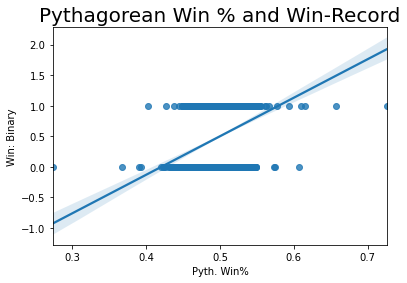

In [16]:
# Plot the LPM to articulate problems with categorical outcome variables
## Create a scatter plot to explore the relationship between IV (i.e., pyth_wpc) and DV(i.e., WIN)

sns.regplot(x = 'pyth_wpc', y = 'WIN', data = NBA17)
plt.xlabel("Pyth. Win%")
plt.ylabel('Win: Binary')
plt.title("Pythagorean Win % and Win-Record", fontsize = 20)

In [17]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
# Specify the model and save it onto the object, named Win_Pyth
Win_Pyth = 'WIN ~ pyth_wpc'

# Fit logistic regression
Lg_model = smf.glm(formula = Win_Pyth, data = NBA17, family=sm.families.Binomial())

result = Lg_model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    WIN   No. Observations:                 2378
Model:                            GLM   Df Residuals:                     2376
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1513.6
Date:                Mon, 15 Jul 2024   Deviance:                       3027.3
Time:                        15:02:34   Pearson chi2:                 2.41e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2824      1.027    -14.877      0.0

In [19]:
print("Coefficients")
print(result.params)
print("p-Values")
print(result.pvalues)
print("Dependent variables")
print(result.model.endog_names)

Coefficients
Intercept   -15.282377
pyth_wpc     30.573898
dtype: float64
p-Values
Intercept    4.653314e-50
pyth_wpc     3.747873e-50
dtype: float64
Dependent variables
WIN


In [20]:
fittedProbs = result.predict()

#Print first 10 probabilites corresponding to the probabilities of winning
print(fittedProbs)

[0.61320335 0.38896784 0.53255106 ... 0.66025312 0.76809196 0.26183995]


In [21]:
# Based on the fitted probabilities of winning, here we crated a binary winning variable for 1 indicating Win (Prob. > 50%), 0 indicating Lose (Prob. < 50%)
fittedWin = [1 if x > .5 else 0 for x in fittedProbs]
print(fittedWin[0:10])

[1, 0, 1, 0, 0, 1, 1, 0, 0, 1]


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(NBA17['WIN'], fittedWin)

array([[742, 448],
       [389, 799]])

In [23]:
# Success rate
(742+799)/2378

0.6480235492010092

In [24]:
Win_Pyth_hm = 'WIN~pyth_wpc + HOME'
Lg_Home = smf.glm(formula=Win_Pyth_hm, data = NBA17, family=sm.families.Binomial())
result2 = Lg_Home.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    WIN   No. Observations:                 2378
Model:                            GLM   Df Residuals:                     2375
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1481.6
Date:                Mon, 15 Jul 2024   Deviance:                       2963.2
Time:                        15:02:36   Pearson chi2:                 2.41e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.9054      1.049    -15.160      0.0

In [25]:
print("Coefficients")
print(result2.params)
print("p-Values")
print(result2.pvalues)
print("Dependent variables")
print(result2.model.endog_names)

Coefficients
Intercept   -15.905353
pyth_wpc     31.119647
HOME          0.700551
dtype: float64
p-Values
Intercept    6.514179e-52
pyth_wpc     3.003712e-50
HOME         2.156804e-15
dtype: float64
Dependent variables
WIN


In [26]:
# Obtain the fitted probabilites from the multiple logistic regression model

fittedProbs2 = result2.predict()
print(fittedProbs2)

[0.69410681 0.30791206 0.44584633 ... 0.58080981 0.70448793 0.33080188]


In [27]:
# Create a binary winning variable using the fitted probabilities above
fittedWin2 = [1 if x > .5 else 0 for x in fittedProbs2]
print(fittedWin2[0:10])

[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]


In [28]:
confusion_matrix(NBA17['WIN'], fittedWin2)

array([[787, 403],
       [423, 765]])

In [29]:
# Success rate
(787+765)/2378

0.6526492851135408